<a href="https://colab.research.google.com/github/Tobsam237/Project_capstone3/blob/main/02_Data_Wranggling_Capstone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Wrangling**
##**Introduction**
![Foetus](https://www.evolvingsciences.com/wpimages/wpbeeb7737_05_06.jpg)
<br>
This project aims to identify trends and patterns in fetal heart rate and uterine contractions, ultimately predicting fetal state based on data.

##**Imports**

Lets import necessary libaries for wrangling data and load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
data= files.upload()

Saving CTG.csv to CTG.csv


In [ ]:
#Load data
df = pd.read_csv('CTG.csv')
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


##**Understanding our data**

**Features:**
* FileName: of CTG examination
* Date: of the examination
* b: start instant
* e: end instant
* LBE: baseline value (medical expert)
* LB: baseline value (SisPorto)
* AC: accelerations (SisPorto)
* FM: foetal movement (SisPorto)
* UC: uterine contractions (SisPorto)
* ASTV: percentage of time with abnormal short term variability (SisPorto)
* mSTV: mean value of short term variability (SisPorto)
* ALTV: percentage of time with abnormal long term variability (SisPorto)
* mLTV: mean value of long term variability (SisPorto)
* DL: light decelerations
* DS: severe decelerations
* DP: prolongued decelerations
* DR: repetitive decelerations
* Width: histogram width
* Min: low freq. of the histogram
* Max: high freq. of the histogram
* Nmax: number of histogram peaks
* Nzeros: number of histogram zeros
* Mode: histogram mode
* Mean: histogram mean
* Median: histogram median
* Variance: histogram variance
* Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
* A: calm sleep
* B: REM sleep
* C: calm vigilance
* D: active vigilance
* SH: shift pattern (A or Susp with shifts)
* AD: accelerative/decelerative pattern (stress situation)
* DE: decelerative pattern (vagal stimulation)
* LD: largely decelerative pattern
* FS: flat-sinusoidal pattern (pathological state)
* SUSP: suspect pattern
* CLASS: Class code (1 to 10) for classes A to SUSP
* NSP:- Normal=1; Suspect=2; Pathologic=3



In [ ]:
#Let's check the summary of our data
df.describe()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2128.000000,2128.000000,2128.000000,2128.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,8.207616,1.576128,0.003759,0.127820,0.0,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.180621,0.272342,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,894.084748,930.919143,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,5.701926,2.517794,0.061213,0.471687,0.0,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.384794,0.445270,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,4.600000,0.000000,0.000000,0.000000,0.0,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,7.400000,0.000000,0.000000,0.000000,0.0,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,10.800000,3.000000,0.000000,0.000000,0.0,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,50.700000,16.000000,1.000000,4.000000,0.0,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [ ]:
print(df.shape)
print(df.info())

(2129, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-

In [ ]:
df.nunique()

FileName     352
Date          48
SegFile     2126
b            979
e           1064
LBE           48
LB            48
AC            22
FM            96
UC            19
ASTV          75
MSTV          57
ALTV          87
MLTV         249
DL            15
DS             2
DP             5
DR             1
Width        154
Min          109
Max           86
Nmax          18
Nzeros         9
Mode          88
Mean         103
Median        95
Variance     133
Tendency       3
A              2
B              2
C              2
D              2
E              2
AD             2
DE             2
LD             2
FS             2
SUSP           2
CLASS         10
NSP            3
dtype: int64

In [ ]:
#Let's see what our data is like
df[df.FileName =='Rmfd_1.txt']

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
594,Rmfd_1.txt,5/2/1996,CTG0595.txt,0.0,1199.0,148.0,148.0,2.0,5.0,4.0,77.0,0.5,3.0,9.6,0.0,0.0,0.0,0.0,32.0,140.0,172.0,2.0,0.0,150.0,152.0,153.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
595,Rmfd_1.txt,5/2/1996,CTG0596.txt,23.0,953.0,148.0,148.0,0.0,3.0,4.0,79.0,0.4,4.0,10.0,0.0,0.0,0.0,0.0,20.0,140.0,160.0,1.0,0.0,150.0,151.0,153.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2.0
596,Rmfd_1.txt,5/2/1996,CTG0597.txt,170.0,768.0,148.0,148.0,0.0,1.0,3.0,82.0,0.4,5.0,8.4,0.0,0.0,0.0,0.0,18.0,142.0,160.0,0.0,0.0,150.0,151.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
597,Rmfd_1.txt,5/2/1996,CTG0598.txt,305.0,953.0,148.0,148.0,0.0,2.0,3.0,77.0,0.5,4.0,10.2,0.0,0.0,0.0,0.0,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
598,Rmfd_1.txt,5/2/1996,CTG0599.txt,194.0,953.0,148.0,148.0,0.0,3.0,4.0,78.0,0.5,4.0,10.0,0.0,0.0,0.0,0.0,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2.0
599,Rmfd_1.txt,5/2/1996,CTG0600.txt,431.0,953.0,148.0,148.0,0.0,2.0,2.0,75.0,0.6,0.0,10.7,0.0,0.0,0.0,0.0,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2.0


##**Check for Null values and duplicates**

In [ ]:
missing = pd.concat([df.isna().sum(), 100*df.isna().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
FileName,3,0.140911
Date,3,0.140911
Nzeros,3,0.140911
Mode,3,0.140911
Mean,3,0.140911
Median,3,0.140911
Variance,3,0.140911
Tendency,3,0.140911
A,3,0.140911
B,3,0.140911


Observe that, a very small percent of our data is null so we won't be losing too much data by dropping them.

In [ ]:
df = df.dropna()
df.isna().sum().sum()

0

In [ ]:
df.shape

(2126, 40)

In [ ]:
#Check for duplicates
df.duplicated().sum()

0

With no null values and duplicates, our data seem clean and ready for for processing. However, observe the column 'DR' which has only one unique value. Let's inspect the columns and drop if it adds no value to our data

In [ ]:
#Inspecting 'DR' column 
print(df['DR'].unique())
df.DR

[0.]


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2121    0.0
2122    0.0
2123    0.0
2124    0.0
2125    0.0
Name: DR, Length: 2126, dtype: float64

In [ ]:
df = df.drop(labels='DR', axis=1)
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'Width', 'Min', 'Max',
       'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A',
       'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

##**Exploratory Data Summary**
Our data seems ready for further exploration. Let's do some basic exploration of data

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
b,1.000,0.945,-0.020,-0.020,-0.038,-0.134,0.226,-0.126,0.041,-0.110,-0.100,0.092,0.064,0.092,-0.069,0.049,-0.070,-0.070,0.023,-0.035,-0.082,-0.072,0.055,-0.033,0.050,-0.016,0.021,-0.071,-0.028,0.090,0.070,0.088,-0.126,-0.167,-0.081,-0.111
e,0.945,1.000,-0.014,-0.014,0.072,-0.119,0.387,-0.066,0.045,-0.105,-0.108,0.163,0.068,0.112,-0.027,0.022,-0.022,-0.028,0.017,-0.017,-0.078,-0.052,0.052,-0.025,0.022,0.018,-0.039,-0.083,-0.016,0.139,0.044,0.092,-0.148,-0.172,-0.081,-0.117
LBE,-0.020,-0.014,1.000,1.000,-0.078,-0.033,-0.128,0.306,-0.280,0.286,-0.032,-0.156,-0.054,-0.117,-0.148,0.362,0.275,-0.114,-0.005,0.709,0.723,0.789,-0.134,0.294,-0.023,-0.049,-0.063,0.006,0.158,-0.130,-0.031,-0.122,0.070,0.284,0.143,0.148
LB,-0.020,-0.014,1.000,1.000,-0.078,-0.033,-0.128,0.306,-0.280,0.286,-0.032,-0.156,-0.054,-0.117,-0.148,0.362,0.275,-0.114,-0.005,0.709,0.723,0.789,-0.134,0.294,-0.023,-0.049,-0.063,0.006,0.158,-0.130,-0.031,-0.122,0.070,0.284,0.143,0.148
AC,-0.038,0.072,-0.078,-0.078,1.000,0.054,0.212,-0.198,0.191,-0.345,-0.129,-0.011,-0.039,-0.110,0.292,-0.157,0.373,0.191,-0.011,0.222,0.237,0.251,0.112,0.032,-0.315,0.468,-0.114,0.329,-0.116,0.265,-0.255,-0.141,-0.140,-0.238,-0.255,-0.340
FM,-0.134,-0.119,-0.033,-0.033,0.054,1.000,-0.037,-0.116,0.138,-0.072,0.021,0.076,-0.010,0.205,0.171,-0.158,0.111,0.184,-0.015,-0.037,-0.086,-0.056,0.178,-0.000,-0.077,-0.054,-0.023,0.058,-0.025,0.113,0.001,0.089,-0.004,-0.034,0.078,0.060
UC,0.226,0.387,-0.128,-0.128,0.212,-0.037,1.000,-0.080,0.233,-0.248,-0.107,0.339,0.018,0.152,0.153,-0.113,0.147,0.096,0.023,-0.078,-0.170,-0.111,0.184,-0.061,-0.042,0.023,-0.097,-0.030,-0.026,0.244,0.085,0.114,-0.206,-0.251,-0.073,-0.163
ASTV,-0.126,-0.066,0.306,0.306,-0.198,-0.116,-0.080,1.000,-0.431,0.459,-0.315,-0.037,0.034,0.054,-0.260,0.275,-0.112,-0.168,-0.149,0.058,0.075,0.120,-0.146,-0.006,0.046,-0.140,-0.142,-0.114,0.072,-0.199,-0.132,0.137,0.309,0.364,0.285,0.471
MSTV,0.041,0.045,-0.280,-0.280,0.191,0.138,0.233,-0.431,1.000,-0.470,0.074,0.517,0.034,0.288,0.661,-0.623,0.409,0.501,0.266,-0.308,-0.445,-0.336,0.556,-0.066,-0.242,-0.046,0.021,0.096,-0.126,0.284,0.260,0.275,-0.211,-0.329,0.077,-0.103
ALTV,-0.110,-0.105,0.286,0.286,-0.345,-0.072,-0.248,0.459,-0.470,1.000,-0.171,-0.266,-0.031,-0.140,-0.451,0.423,-0.283,-0.279,-0.122,0.165,0.222,0.186,-0.282,0.042,0.131,-0.240,-0.074,-0.107,0.076,-0.206,-0.118,-0.123,0.478,0.446,0.303,0.426


Observe 
* the columns; 'Mode', 'Mean', 'Median' all have a high correlation between them, we will futher explore them before dropping in the following procedures.
* columns 'LBE' and 'LB' has a perfect correlation, let's further investigate.

In [ ]:
#Further inspect columns 'LBE' and 'LB'
df[['LBE', 'LB']].sample(10)

,LBE,LB
1111,122.0,122.0
1963,133.0,133.0
197,145.0,145.0
1299,114.0,114.0
117,123.0,123.0
964,133.0,133.0
112,129.0,129.0
2038,128.0,128.0
35,120.0,120.0
401,150.0,150.0


In [ ]:
#We see every random sample in 'LBE' and 'LB' reveals duplicated data
print(df[['LBE', 'LB']].duplicated().sum())

#Let's drop 'LB'
df = df.drop(labels=['LB'], axis=1)
df.shape

2078


(2126, 38)

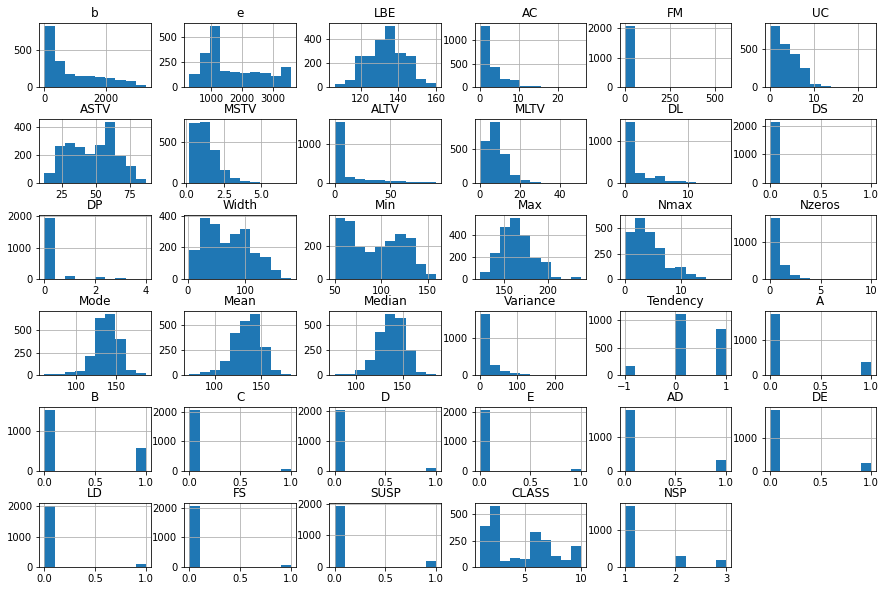

In [ ]:
#Let's get a general overview of our data
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

Some of the distributions looks good while some are clearly co-linear and skewed. In the following procedures, we explore eeach feature and perform dimensional reduction and thereafter drop features that adds nothing to optimise model and memory and also standardise our data.

##**Saving Data**
Our data seems ready for further exploration.

In [ ]:
df.head()

,FileName,Date,SegFile,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
df.shape

(2126, 38)

In [ ]:
'''df.to_csv('df_wrangled3.csv')
files.download('df_wrangled3.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>